In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('../MNIST_data', validation_size=0)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


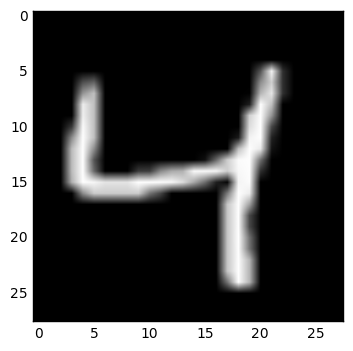

In [3]:
img = mnist.train.images[2]
img = img.reshape((28, 28))
plt.imshow(img, cmap="Greys_r")
plt.show()

In [4]:
def leaky_relu(x, alpha=0.2):
    return tf.maximum(x * alpha, x)

First, I try with simple problem. <br>
* Generator 
  1. input = latent vector (100 x 1 x 1)
  2. conv2d = kernel(4x4), leaky relu, 

### Define inputs

In [ ]:
def define_inputs(x_size, batch_size, )

### Generator 

In [7]:
def generator(z, batch_size, reuse=False):
    with tf.variable_scope("generator", reuse=reuse):
        z_reshaped = tf.reshape(z, shape=[batch_size, 1, 1, 100])
        z_padded = tf.pad(z_reshaped, [[0, 0], [3, 3], [3, 3], [0, 0]])
        W_conv1 = tf.get_variable(shape=(4, 4, 100, 3), name="conv1_Weight")
        b_conv1 = tf.get_variable(shape=3, name="conv1_bias")
        conv1 = tf.nn.conv2d(z_padded, filter=W_conv1, strides=(1, 1, 1, 1), padding="VALID") + b_conv1
        logit = tf.tanh(conv1)
        relu1 = leaky_relu(conv1)
                             
        return logit, relu1

### Discriminator

In [ ]:
def Discriminator 

### Down sampling image

In [20]:
def down_sampling(x, batch_size, reuse=False):
    # average pooling until it gets to 4x4
    # now 28 x 28
    pool1 = tf.nn.avg_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
    # now 14 x 14 
    pool2 = tf.nn.avg_pool(pool1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
    # now 7 x 7
    pool3 = tf.nn.avg_pool(pool2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
    # now 4 x 4
    return pool3

### loss 

In [ ]:
def losses(d, g_logit):
    d_labels_real = tf.ones_like(d, )

In [23]:
tf.reset_default_graph()
batch_size = 1
x = tf.placeholder(shape=(batch_size, 28, 28, 1), dtype=tf.float32)
z = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32)
g_logit, g_relu = generator(z, batch_size)
d_pool = discriminator(x, batch_size)

In [24]:
print(d_pool)

Tensor("discriminator/AvgPool_2:0", shape=(1, 4, 4, 1), dtype=float32)


### Training

(1, 4, 4, 1)


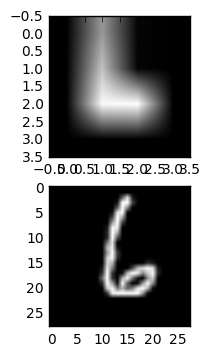

In [47]:
with tf.Session() as sess:
    batch = mnist.train.next_batch(batch_size)
    img = batch[0].reshape(batch_size, 28, 28, 1)
    d = sess.run(d_pool, feed_dict={x: img})
#     print(d.shape)
#     fig = plt.figure()
#     ax1 = fig.add_subplot(211)
#     ax2 = fig.add_subplot(212)
#     ax1.imshow(d[0, :, :, 0], cmap="gray")
#     ax2.imshow(img[0, :, :, 0], cmap="gray")
#     plt.show()
    